In [1]:
# import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
from scipy import stats
from matplotlib.pyplot import figure

In [2]:
# read in raw data of Median List Price using pandas
median_data_to_load = 'Resources/median_list_price.csv'
lr_median_list_price = pd.read_csv(median_data_to_load)

# View DataFrame
lr_median_list_price.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
0,102001,0,United States,country,NaN,263267.0,271267.0,276633.0,280000.0,280300.0,...,376300.0,387967.0,393300.0,393300.0,391300.0,386633.0,381667.0,375733.0,371900.0,371900.0
1,394913,1,"New York, NY",msa,NY,503000.0,513000.0,521300.0,526300.0,528300.0,...,610667.0,617667.0,613330.0,606330.0,599663.0,606333.0,612999.0,619333.0,619333.0,626000.0
2,753899,2,"Los Angeles, CA",msa,CA,721333.0,735000.0,743333.0,750000.0,749667.0,...,916596.0,924967.0,920633.0,910333.0,901667.0,897667.0,894333.0,887667.0,882646.0,885980.0
3,394463,3,"Chicago, IL",msa,IL,284600.0,294600.0,300600.0,302267.0,301967.0,...,317967.0,323300.0,324967.0,322967.0,319967.0,314967.0,308600.0,302933.0,299300.0,301000.0
4,394514,4,"Dallas, TX",msa,TX,322997.0,328497.0,331797.0,332800.0,329502.0,...,419330.0,432663.0,438297.0,434967.0,428300.0,419000.0,410667.0,403667.0,398000.0,396667.0


In [3]:
# Drop the uneeded beginning date columns from Median List Price dataframe
lr_median_list_price.drop(lr_median_list_price.iloc[:,3:10], inplace=True, axis=1)

In [4]:
# Drop Region ID and final feburary date column from Median List Price dataframe
lr_median_list_price.drop(['RegionID','2023-02-28'], inplace=True, axis=1)

In [5]:
# Filter to only the top 26 rows
lr_median_list_price = lr_median_list_price.loc[(lr_median_list_price['SizeRank'] <26), :]

#set SizeRank to index
lr_median_list_price = lr_median_list_price.set_index('SizeRank')

lr_median_list_price.head()

,RegionName,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
SizeRank,,,,,,,,,,,,,,,,,,,,,
0,United States,279633.0,279600.0,279300.0,278933.0,277300.0,275967.0,276633.0,281300.0,287967.0,...,362967.0,376300.0,387967.0,393300.0,393300.0,391300.0,386633.0,381667.0,375733.0,371900.0
1,"New York, NY",526600.0,526267.0,527600.0,529000.0,527667.0,524667.0,524667.0,528000.0,537667.0,...,603550.0,610667.0,617667.0,613330.0,606330.0,599663.0,606333.0,612999.0,619333.0,619333.0
2,"Los Angeles, CA",742967.0,736267.0,728267.0,724633.0,719667.0,711300.0,711600.0,716267.0,732633.0,...,904963.0,916596.0,924967.0,920633.0,910333.0,901667.0,897667.0,894333.0,887667.0,882646.0
3,"Chicago, IL",297933.0,296117.0,292783.0,288483.0,283333.0,280000.0,284300.0,291267.0,301267.0,...,309300.0,317967.0,323300.0,324967.0,322967.0,319967.0,314967.0,308600.0,302933.0,299300.0
4,"Dallas, TX",324202.0,321168.0,318966.0,317633.0,315999.0,313333.0,313667.0,316967.0,323633.0,...,407333.0,419330.0,432663.0,438297.0,434967.0,428300.0,419000.0,410667.0,403667.0,398000.0


In [6]:
# Write cleaned Dataframe to my personal output data folder
lr_median_list_price.to_csv('Output Data/lr_cleaned_mlp.csv')

# Write cleaned Dataframe to group data folder
lr_median_list_price.to_csv('../data/lr_cleaned_mlp.csv')

In [7]:
# Set US to index for US comparison graph
lr_median_list_price_us = lr_median_list_price.set_index('RegionName')
lr_median_list_price_us.head()

,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,279633.0,279600.0,279300.0,278933.0,277300.0,275967.0,276633.0,281300.0,287967.0,294567.0,...,362967.0,376300.0,387967.0,393300.0,393300.0,391300.0,386633.0,381667.0,375733.0,371900.0
"New York, NY",526600.0,526267.0,527600.0,529000.0,527667.0,524667.0,524667.0,528000.0,537667.0,544333.0,...,603550.0,610667.0,617667.0,613330.0,606330.0,599663.0,606333.0,612999.0,619333.0,619333.0
"Los Angeles, CA",742967.0,736267.0,728267.0,724633.0,719667.0,711300.0,711600.0,716267.0,732633.0,742667.0,...,904963.0,916596.0,924967.0,920633.0,910333.0,901667.0,897667.0,894333.0,887667.0,882646.0
"Chicago, IL",297933.0,296117.0,292783.0,288483.0,283333.0,280000.0,284300.0,291267.0,301267.0,306300.0,...,309300.0,317967.0,323300.0,324967.0,322967.0,319967.0,314967.0,308600.0,302933.0,299300.0
"Dallas, TX",324202.0,321168.0,318966.0,317633.0,315999.0,313333.0,313667.0,316967.0,323633.0,328467.0,...,407333.0,419330.0,432663.0,438297.0,434967.0,428300.0,419000.0,410667.0,403667.0,398000.0


In [8]:
# Import average mortgage rate data from group data folder
lr_mortgage_rate_to_load = '../data/cp_average_mortgage_rate.csv'
average_mortgage_rate = pd.read_csv(lr_mortgage_rate_to_load)
average_mortgage_rate.head()

,Year,Month,Average Rate
0,2018,8,4.5500
1,2018,9,4.6275
2,2018,10,4.8300
3,2018,11,4.8660
4,2018,12,4.6375


The r-value is: 0.23861982527285788


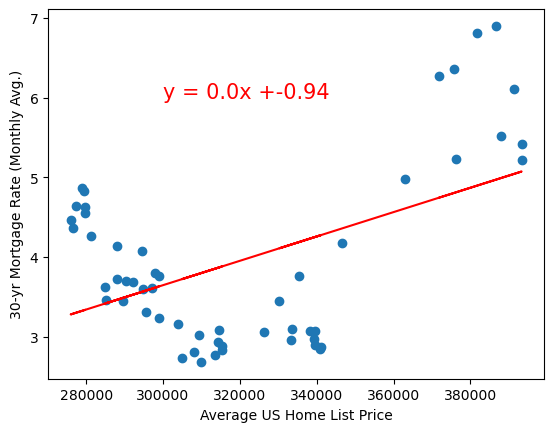

In [9]:
# Linear regression on US Average Mortgage Rate vs US Average Home List Price
us_average_home_list = lr_median_list_price_us.loc['United States']
us_average_home_list=us_average_home_list.astype(float)
us_average_mortgage= average_mortgage_rate['Average Rate']
us_average_mortgage=us_average_mortgage.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(us_average_home_list, us_average_mortgage)
regress_values = us_average_home_list * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(us_average_home_list,us_average_mortgage)
plt.plot(us_average_home_list,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Average US Home List Price')
plt.ylabel('30-yr Mortgage Rate (Monthly Avg.)')
plt.annotate(line_eq,(300000,6),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure to main folder
plt.savefig("../images/lr_median_list_corr.png")
# Save the figure to my folder
plt.savefig("Output Data/lr_median_list_corr.png")

# Show plot
plt.show()

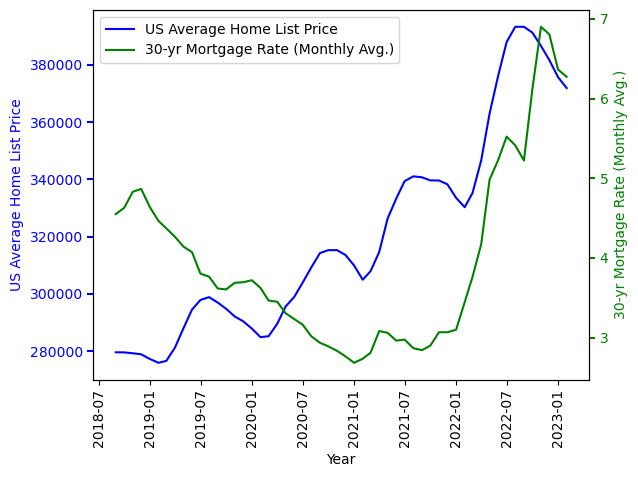

In [10]:
# plot Average US List Price and Average US Mortgage Rate multi-line Plot

# set x and y values
us_average_home_list = lr_median_list_price_us.loc['United States']
us_average_home_list=us_average_home_list.astype(float)

us_average_mortgage= average_mortgage_rate['Average Rate']
us_average_mortgage=us_average_mortgage.astype(float)

years = lr_median_list_price_us.keys()
years_2 = pd.to_datetime(years)

# plot figure using ax subplots for multi-y-axis
fig, ax = plt.subplots()
twin1 = ax.twinx()

list_price_plot, = ax.plot(years_2, us_average_home_list, color="blue", label="US Average Home List Price" )
mortgage_plot, = twin1.plot(years_2, us_average_mortgage, color='green', label="30-yr Mortgage Rate (Monthly Avg.)")

# set tick lables, colors, and rotation
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=list_price_plot.get_color(), **tkw)
twin1.tick_params(axis='y', colors=mortgage_plot.get_color(), **tkw)

ax.yaxis.label.set_color(list_price_plot.get_color())
twin1.yaxis.label.set_color(mortgage_plot.get_color())

#set labels
ax.set_xlabel('Year')
ax.set_ylabel('US Average Home List Price')
twin1.set_ylabel('30-yr Mortgage Rate (Monthly Avg.)')

# set legend
ax.legend(handles = [list_price_plot, mortgage_plot])

# Save the figure to main folder
plt.savefig("../images/lr_median_list_multi_line.png")
# Save the figure to my folder
plt.savefig("Output Data/lr_median_list_multi_line.png")

# show plot
plt.show()

In [11]:
# Import average sales rate data from group data folder
cp_sales_price_to_load = '../data/cp_median_sale_price_cleaned.csv'
average_sales_price = pd.read_csv(cp_sales_price_to_load)
average_sales_price.head()

,RegionName,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,...,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023
0,United States,234730.0,234204.0,234463.0,235793.0,236051.0,237189.0,237591.0,240356.0,242432.0,...,347712.0,354759.0,357096.0,353337.0,347545.0,343106.0,340474.0,337433.0,333395.0,330963
1,"New York, NY",400544.0,406886.0,405333.0,408229.0,400611.0,401382.0,400577.0,401650.0,401362.0,...,530064.0,537957.0,545143.0,551160.0,557161.0,554162.0,545334.0,535995.0,531301.0,528584
2,"Los Angeles, CA",631226.0,627691.0,629338.0,630193.0,628718.0,624524.0,621848.0,625020.0,628934.0,...,891677.0,904875.0,903309.0,886535.0,871617.0,859954.0,856337.0,849322.0,840678.0,835434
3,"Chicago, IL",223621.0,222898.0,223829.0,227846.0,229560.0,230611.0,233522.0,236514.0,237164.0,...,288628.0,290468.0,294768.0,295454.0,294196.0,290457.0,287437.0,286443.0,286682.0,286914
4,"Dallas, TX",259950.0,255109.0,253399.0,253805.0,254198.0,253403.0,253775.0,255327.0,257809.0,...,388741.0,403062.0,412268.0,410701.0,404747.0,396723.0,391805.0,387637.0,381228.0,375177


In [12]:
# Set median sales price df RegionName to index for comparison graph
cp_average_sales_price = average_sales_price.set_index('RegionName')
cp_average_sales_price.head()

,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,...,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,234730.0,234204.0,234463.0,235793.0,236051.0,237189.0,237591.0,240356.0,242432.0,244478.0,...,347712.0,354759.0,357096.0,353337.0,347545.0,343106.0,340474.0,337433.0,333395.0,330963
"New York, NY",400544.0,406886.0,405333.0,408229.0,400611.0,401382.0,400577.0,401650.0,401362.0,400485.0,...,530064.0,537957.0,545143.0,551160.0,557161.0,554162.0,545334.0,535995.0,531301.0,528584
"Los Angeles, CA",631226.0,627691.0,629338.0,630193.0,628718.0,624524.0,621848.0,625020.0,628934.0,629119.0,...,891677.0,904875.0,903309.0,886535.0,871617.0,859954.0,856337.0,849322.0,840678.0,835434
"Chicago, IL",223621.0,222898.0,223829.0,227846.0,229560.0,230611.0,233522.0,236514.0,237164.0,235628.0,...,288628.0,290468.0,294768.0,295454.0,294196.0,290457.0,287437.0,286443.0,286682.0,286914
"Dallas, TX",259950.0,255109.0,253399.0,253805.0,254198.0,253403.0,253775.0,255327.0,257809.0,261591.0,...,388741.0,403062.0,412268.0,410701.0,404747.0,396723.0,391805.0,387637.0,381228.0,375177


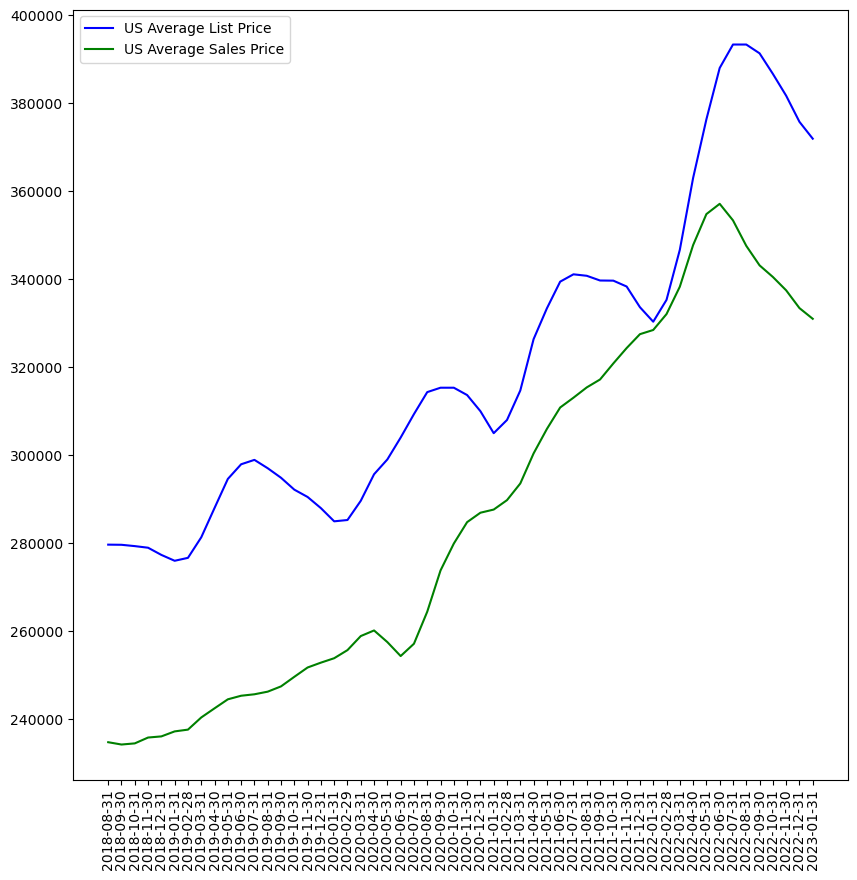

In [13]:
# Multi plot of Average Mortgage rate vs. Average Sales price
list_price = lr_median_list_price_us.loc['United States']
sales_price = cp_average_sales_price.loc['United States']

x_axis = lr_median_list_price_us.keys()

plt.figure(figsize=(10,10))

list_price_plot, = plt.plot(x_axis, list_price, color="blue", label="US Average List Price" )

sales_plot, = plt.plot(x_axis, sales_price, color='green', label="US Average Sales Price")

plt.xticks(rotation="vertical")
plt.legend(handles=[list_price_plot, sales_plot], loc="best")

# Save the figure to main folder
plt.savefig("../images/lr_sales_list_comparison.png")
# Save the figure to my folder
plt.savefig("Output Data/lr_sales_list_comparison.png")

plt.show()

In [14]:
# read in raw data of prime rates using pandas
prime_rates_data_to_load = 'Resources/lr _prime_rates.csv'
lr_prime_rates = pd.read_csv(prime_rates_data_to_load)
lr_prime_rates.head()

,DATE,MPRIME
0,8/1/2018,5.00
1,9/1/2018,5.03
2,10/1/2018,5.25
3,11/1/2018,5.25
4,12/1/2018,5.35


In [15]:
# Import average mortgage rate data from group data folder
lr_mortgage_rate_to_load = '../data/cp_average_mortgage_rate.csv'
average_mortgage_rate = pd.read_csv(lr_mortgage_rate_to_load)
average_mortgage_rate.head()

,Year,Month,Average Rate
0,2018,8,4.5500
1,2018,9,4.6275
2,2018,10,4.8300
3,2018,11,4.8660
4,2018,12,4.6375


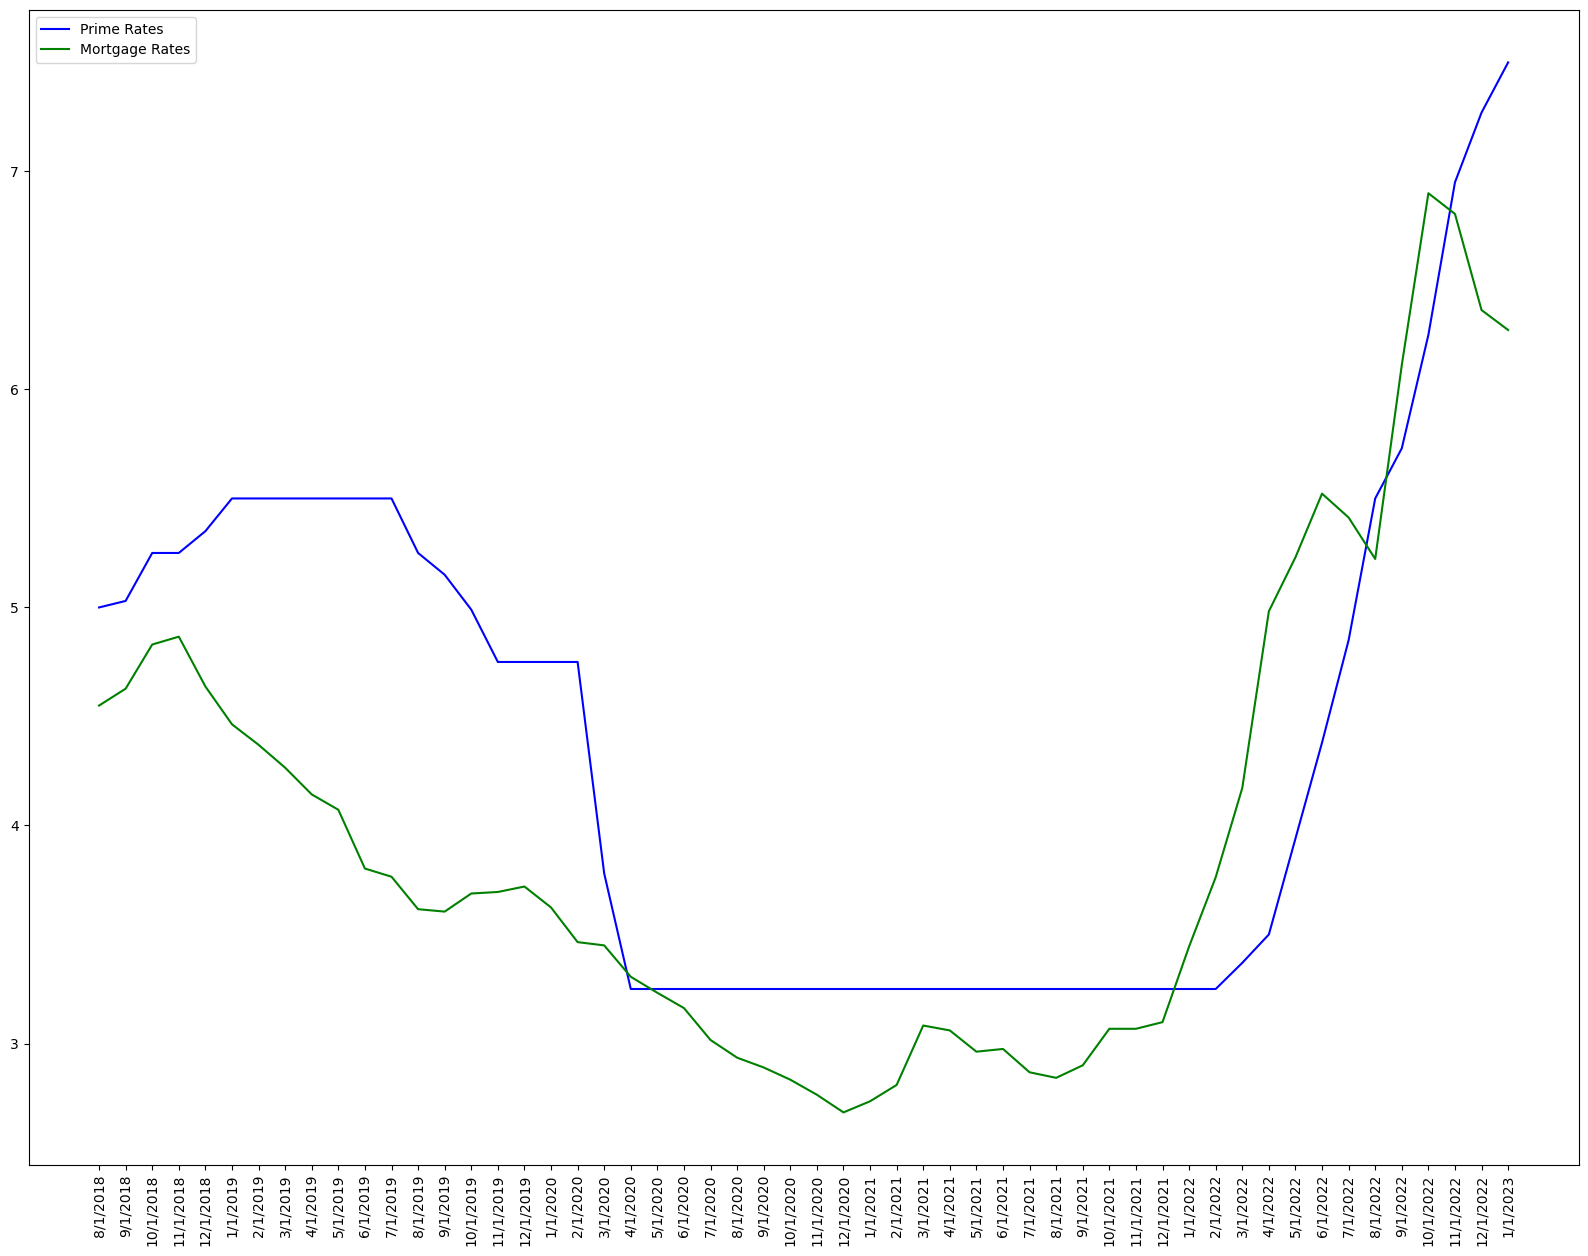

In [16]:
# plot bank prime rates vs mortgage rates to explore results for analysis
# Not for final project
cp_mortgage_rates_to_plot = average_mortgage_rate['Average Rate']
prime_rates_to_plot = lr_prime_rates['MPRIME']

years = lr_prime_rates['DATE']

plt.figure(figsize=(20,15))
prime_loan_plot, = plt.plot(years, prime_rates_to_plot, color="blue", label="Prime Rates" )

mortgage_plot, = plt.plot(years, cp_mortgage_rates_to_plot, color='green', label="Mortgage Rates")

plt.xticks(rotation="vertical")
plt.legend(handles=[prime_loan_plot, mortgage_plot], loc="best")

# Save the figure to my folder
plt.savefig("Output Data/lr_mortgage_prime_comparison.png")

plt.show()